<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [61]:
import pandas as pd
import re
from spacy.tokenizer import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


yelp = pd.read_json('./data/review_sample.json', lines=True)

In [57]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [62]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [63]:
yelp.describe()

,cool,funny,stars,useful
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.564800,0.468900,3.735800,1.363600
std,2.040298,1.801043,1.461647,3.129085
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,2.000000
max,61.000000,79.000000,5.000000,62.000000


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [65]:
#tokenize function
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [66]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [67]:
# Applied tokenize to dataframe:
# yelp['text'].head()

yelp['tokens'].head()

0    [beware, fake, fake, fakewe, also, own, a, sma...
1    [came, here, for, lunch, togo, service, was, q...
2    [ive, been, to, vegas, dozens, of, times, and,...
3    [we, went, here, on, a, night, where, they, cl...
4    [35, to, 4, starsnot, bad, for, the, price, 12...
Name: tokens, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [75]:
# TFIDF Vectorizer:

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(yelp['text'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,0,0 stars,05,06,1,1 12,1 2,1 beef,1 charge,1 coffee,...,zest,zing,zip,zombie,zombies,zone,zoo,zucchini,zucchini fries,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KNN Model and query:

In [76]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [79]:
# Fake Review
fake_review = [ """
                I love the eat food.  It's so delicious.  This restaurant had a great atmosphere.
                """]

In [87]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[15]])

(array([[0.        , 1.        , 1.        , 1.31156697, 1.32199614]]),
 array([[  15, 6204, 6311, 4271, 1729]], dtype=int64))

In [88]:
# Comparing reviews 15 and 6204 to see how they look in comparison:
yelp['text'][15][:200]

'Girls night out tonight with my kid so we decided to make the drive to have what we hoped would be good burrata.\n\nThis is a beautiful restaurant. There was a function on tonight with the restaurant pa'

In [91]:
# Comparing reviews 4271 and 6204 to see how they look in comparison:
yelp['text'][4271][:200]

'Went to Casalinga for the first time tonight, with my family, to celebrate my birthday.  The service was great.  Very friendly and inviting. The food was delicious. I had the Gnocchi, which was handma'

In [94]:
# Now let's query for a doc like my 'fake_review'
new = tfidf.transform(fake_review)

In [97]:
nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.23983838, 1.24511238, 1.24613637]]),
 array([[6204, 6311, 7898, 5410, 7641]], dtype=int64))

In [100]:
# Compare my review vs 6311...
yelp['text'][7898][:200]

'First time eating here. I was impressed. Great Atmosphere, great food and our server Jeannette was fantastic.'

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [103]:
# Create train_test_split to build model:
from sklearn.model_selection import train_test_split

train, test = train_test_split(yelp, test_size=0.2, random_state=42)

In [106]:
print(train.shape)
test.shape

(8000, 10)


(2000, 10)

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()
pipe = Pipeline([('vect', vect), ('clf', rfc)])

In [108]:
# make params for classification model
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(train['text'], train['stars'])

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   42.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [110]:
# Predictions on test sample
pred = grid_search.predict(test['text'])

In [112]:
# Looking for score.
grid_search.best_score_

0.542875

In [113]:
# Prediction of stars on my 'fake_review'!  BOOOYAH I GOT A 5!
grid_search.predict(fake_review)

array([5], dtype=int64)

In [146]:
yelp.tokens[0]

['beware',
 'fake',
 'fake',
 'fakewe',
 'also',
 'own',
 'a',
 'small',
 'business',
 'in',
 'los',
 'alamitos',
 'ca',
 'and',
 'received',
 'what',
 'looked',
 'like',
 'a',
 'legitimate',
 'bill',
 'for',
 '70',
 'with',
 'an',
 'account',
 'number',
 'and',
 'all',
 'i',
 'called',
 'the',
 'phone',
 'number',
 'listed',
 '866',
 '2737934',
 'the',
 'wait',
 'time',
 'on',
 'hold',
 'said',
 '20',
 'minutes',
 'and',
 'to',
 'leave',
 'a',
 'message',
 'i',
 'could',
 'not',
 'get',
 'a',
 'live',
 'person',
 'on',
 'the',
 'phone',
 'no',
 'matter',
 'what',
 'number',
 'i',
 'selected',
 'i',
 'left',
 'a',
 'very',
 'firm',
 'message',
 'that',
 'i',
 'would',
 'be',
 'contacting',
 'the',
 'bbb',
 'and',
 'my',
 'attorney',
 'regarding',
 'their',
 'company',
 'trying',
 'to',
 'scam',
 'businesses',
 'this',
 'has',
 'to',
 'be',
 'illegal']

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [147]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

In [148]:
# Update yelp.tokens to not include stopwords
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(yelp['text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

yelp['tokens_nostop'] = tokens

Learn the vocubalary of the yelp data:

In [150]:
# Learn voacb
id2word = Dictionary(yelp['tokens_nostop'])
print(len(id2word))

60605


In [151]:
# Apply a filter to remove extremes
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

10607


Create a bag of words representation of the entire corpus

In [152]:
# BOW to represent the corpus
corpus = [id2word.doc2bow(d) for d in yelp['tokens_nostop']]

Your LDA model should be ready for estimation: 

In [153]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=2,
                   num_topics = 10
                  )

## Create 1-2 visualizations of the results

In [154]:
#Visualization #1
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [155]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.003064  0.001940       1        1  10.360757
6      0.000519  0.005521       2        1  10.342485
4     -0.000781 -0.000895       3        1  10.206114
9     -0.001643 -0.002581       4        1  10.131855
3     -0.005972  0.000555       5        1  10.121071
1      0.005385  0.002055       6        1   9.858298
5     -0.000913  0.000268       7        1   9.779539
2      0.001222 -0.003468       8        1   9.766806
0      0.001279 -0.003103       9        1   9.756119
7      0.003968 -0.000293      10        1   9.676951, topic_info=         Term          Freq         Total Category  logprob  loglift
0              14214.000000  14214.000000  Default  30.0000  30.0000
49       \n\n   8378.000000   8378.000000  Default  29.0000  29.0000
329        \n   3155.000000   3155.000000  Default  28.0000  28.0000
363      food   3557.000000   3557.000000  Default  27.0000  27.0000
207     great   3361.000000   3361.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
115      went    129.833466   1414.238525  Topic10  -5.8865  -0.0527
44    service    174.912170   2540.744873  Topic10  -5.5885  -0.3405
1280  ordered    127.825455   1425.048218  Topic10  -5.9021  -0.0759
592       i'm    126.821617   1534.387573  Topic10  -5.9100  -0.1577
198     don't    126.447479   1770.275757  Topic10  -5.9129  -0.3036

[872 rows x 6 columns], token_table=      Topic      Freq Term
term                      
329       1  0.089995   \n
329       2  0.112177   \n
329       3  0.098867   \n
329       4  0.072249   \n
329       5  0.062426   \n
...     ...       ...  ...
7578      6  0.171978    à
7578      7  0.068791    à
7578      8  0.103187    à
7578      9  0.103187    à
7578     10  0.103187    à

[5080 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 5, 10, 4, 2, 6, 3, 1, 8])

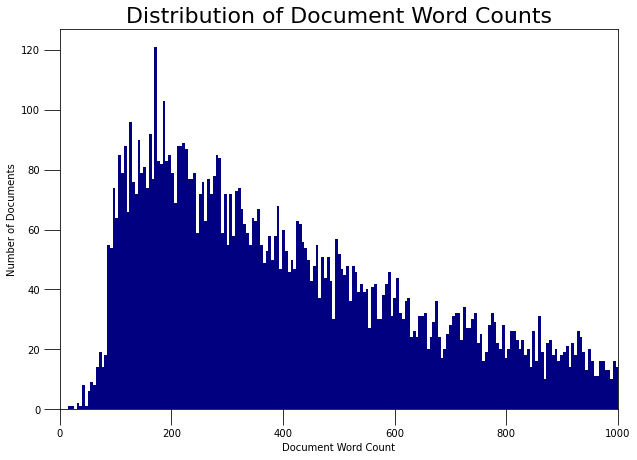

In [156]:
# Distribution of word counts
import matplotlib.pyplot as plt

doc_lens = [len(d) for d in yelp.text]

# Plot
plt.figure(figsize=(10,7))
plt.hist(doc_lens, bins = 1000, color='navy')

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

## markdown, write 1-2 paragraphs of analysis on the results of your topic model

What I can see from this distribtion from above is that most of the words used in the reviews show up in most of the documents.  Combining that anaylsis from the distribution chart I can see from the pyLDAvis visual that the import words that show up are words like, 'great', 'service', 'love', 'nice' and 'best' tell me that the overall sentiment for these reviews are that they are positive in topic.

I own a restaurant and looking at data like this, if these were the words for the topic model for my business I'd be pretty happy.  I know that customers in this industry have to love your product and services.  In the case of the pyLDAvis, you can select topic 4, 'food', and the most relevant term is 'great'.  This is a great and easy way to really determine how good your product is (in the case of a restaurant in this example) and you can make good business decisions based on this info.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)